In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , RobustScaler , StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [2]:
files.upload()

Saving train_set.csv to train_set.csv


In [38]:
df=pd.read_csv('train_set.csv')
df.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [4]:
df.shape

(287836, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [6]:
df.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


In [7]:
df.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [39]:
df=df.dropna()

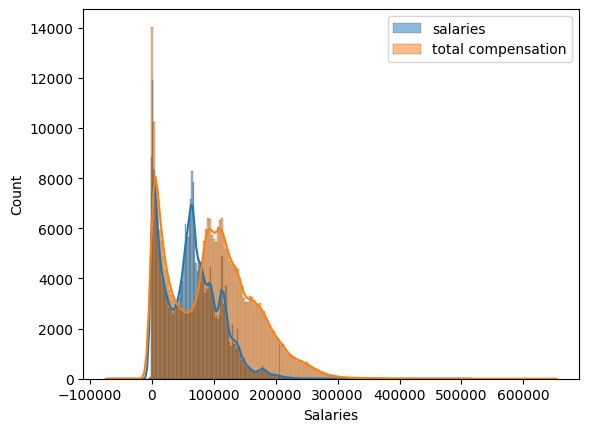

In [40]:
sns.histplot(df['Salaries'], label='salaries',kde=True)
sns.histplot(df['Total_Compensation'],label='total compensation',kde=True)
plt.legend()
plt.show()

In [41]:
sal_ot=np.percentile(df['Salaries'],99)
tc_ot=np.percentile(df['Total_Compensation'],99)
sal_ot,tc_ot

(184289.0, 266281.1799999998)

In [42]:
sal_oto=np.percentile(df['Salaries'],1)
tc_oto=np.percentile(df['Total_Compensation'],1)
sal_oto,tc_oto

(0.0, 415.0)

In [43]:
df.drop(df[(df['Salaries'].values<sal_oto) | (df['Total_Compensation'].values<tc_oto)].index , inplace =True)

In [44]:
df.drop(df[(df['Salaries'].values>sal_ot) | (df['Total_Compensation'].values>tc_ot)].index , inplace =True)

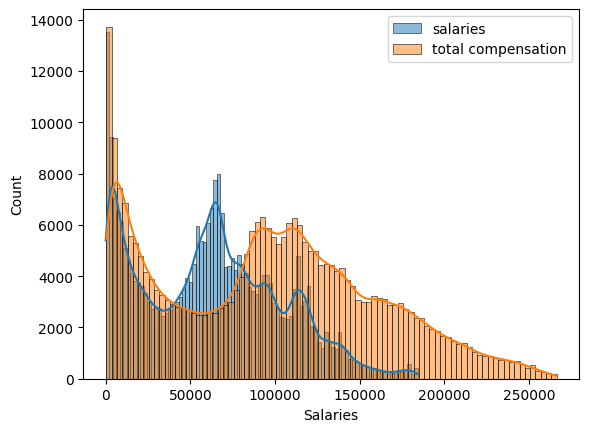

In [45]:
sns.histplot(df['Salaries'], label='salaries',kde=True)
sns.histplot(df['Total_Compensation'],label='total compensation',kde=True)
plt.legend()
plt.show()

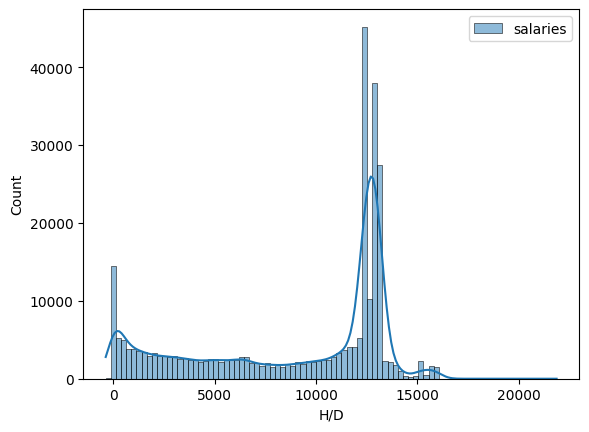

In [46]:
sns.histplot(df['H/D'], label='salaries',kde=True)
plt.legend()
plt.show()

In [47]:
df.drop(df[df['H/D'].values>15645.43].index , inplace =True)

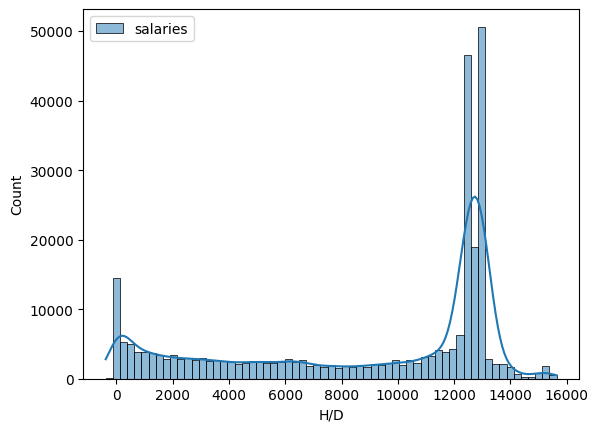

In [48]:
sns.histplot(df['H/D'], label='salaries',kde=True)
plt.legend()
plt.show()


In [18]:
df.dtypes

Year                    int64
OGC                     int64
OG                     object
DC                     object
Dept                   object
UC                      int64
Union                  object
JF                     object
Job                    object
EI                      int64
Salaries                int64
Overtime                int64
H/D                   float64
YT                     object
Total_Compensation      int64
dtype: object

In [49]:
df['OGC'].nunique(),df['OG'].nunique()

(7, 7)

In [50]:
df.drop('OG',axis=1,inplace=True)

In [51]:
df['DC'].nunique(),df['Dept'].nunique()

(54, 54)

In [52]:
df.drop('Dept',axis=1,inplace=True)

In [53]:
df['UC'].nunique(),df['Union'].nunique()

(774, 69)

In [54]:
df['JF'].nunique(),df['Job'].nunique()

(55, 1120)

In [55]:
cat_colums=['JF','Job','DC','Union']
for i in cat_colums:
  fq=df[i].value_counts()/len(df)*100
  df[f'{i}_enc']=df[i].map(fq)
  df.drop(i,axis=1,inplace=True)

In [56]:
yt={'Calendar':0,'Fiscal':1}
df['YT_enc']=df['YT'].map(yt)
df.drop('YT',axis=1,inplace=True)

In [57]:
df.sample(20)

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation,JF_enc,Job_enc,DC_enc,Union_enc,YT_enc
223091,2014,2,253,37629,63079,19810,13365.360000,123235,8.399455,6.337970,14.984774,6.328263,0
124621,2015,2,39,22660,91450,18760,12380.820000,158066,6.092778,0.360239,1.458930,1.644442,1
262484,2014,2,21,9327,158890,0,11787.430000,213149,3.018886,0.519865,2.364560,12.870440,1
240867,2013,7,164,45088,0,0,0.000000,601,0.666909,0.203488,0.094554,0.561210,1
240270,2015,2,253,21415,33969,3958,6649.620000,59801,8.399455,6.337970,14.984774,6.328263,0
220192,2013,4,791,42184,133609,0,12942.026480,203645,10.535720,3.245742,22.057243,7.710975,0
233335,2014,2,200,38308,90654,5660,13255.780000,152494,8.399455,0.596083,14.984774,0.820064,0
180163,2014,4,250,18487,38602,160,7239.286953,74714,10.535720,3.245742,22.057243,5.830688,0
132789,2014,5,790,8001,8250,0,2173.810000,11144,2.771536,1.662778,5.524377,28.838500,1
103982,2014,2,21,22807,85197,0,12512.550000,122868,3.018886,0.268202,4.777296,12.870440,1


<Axes: >

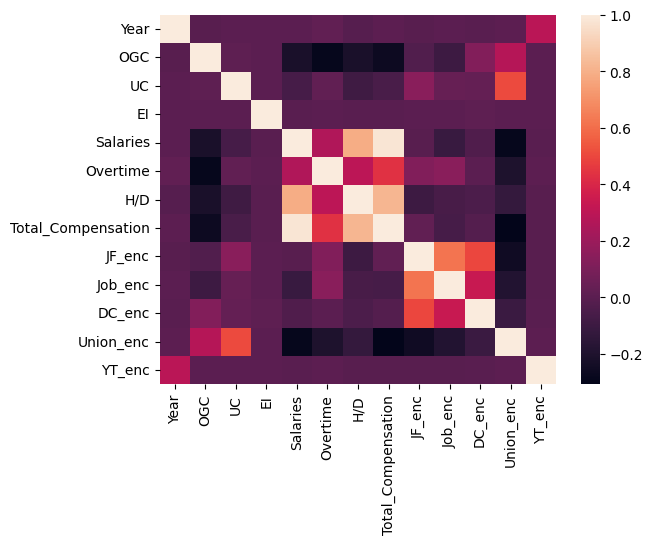

In [58]:
sns.heatmap(df.corr())

In [59]:
x=df.drop('Total_Compensation',axis=1)
y=df['Total_Compensation']

In [60]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=.20)

In [61]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((222519, 12), (55630, 12), (222519,), (55630,))

In [62]:
np.sqrt(len(df))

527.3983314345999

In [ ]:
k=range(10,30)
mse=[]
for i in k:
  knnr=KNeighborsRegressor(n_neighbors=i)
  knnr.fit(x_train,y_train)
  y_pred=knnr.predict(x_test)
  mse.append(mean_squared_error(y_test,y_pred))



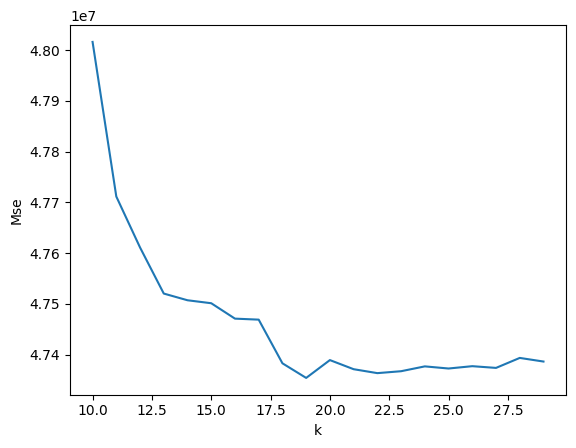

In [ ]:
plt.plot(k,mse)
plt.xlabel('k')
plt.ylabel('Mse')
plt.show()

In [ ]:
k[np.argmin(mse)]

19

In [ ]:
knnr=KNeighborsRegressor(n_neighbors=19)
knnr.fit(x_train,y_train)
y_pred=knnr.predict(x_test)
mean_squared_error(y_test,y_pred)

47354094.656147726